**Proyek Analisis Data**

* nama : David Satriana Putra
* email : m232d4ky1855@bangkit.academy
* id dicoding : davidsatriana


**Menentukan Pertanyaan Bisnis**

* Pertanyaan 1 : Apa tingkat polutan udara yang paling umum di Nongzhanguan?

* Pertanyaan 2 : Bagaimana kualitas udara dalam periode tahunan?

**Import Semua Packages/Library Yang Digunakan**

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

**Data Wrangling**

Gathering Data

In [11]:
# Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Nongzhanguan_20130301-20170228.csv")

# Display the first few rows to understand the data
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan
1,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan
2,3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan
3,4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan
4,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34436 non-null  float64
 6   PM10     34624 non-null  float64
 7   SO2      34618 non-null  float64
 8   NO2      34372 non-null  float64
 9   CO       33858 non-null  float64
 10  O3       34558 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


Assessing Data

In [13]:
# Data overview
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print("\nSummary Statistics:")
print(df.describe())

Number of rows: 35064
Number of columns: 18

Summary Statistics:
                 No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34436.000000  34624.000000  34618.000000  34372.000000  33858.000000   
mean      84.838483    108.991096     18.689242     58.097172   1

In [14]:
# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
No            0
year          0
month         0
day           0
hour          0
PM2.5       628
PM10        440
SO2         446
NO2         692
CO         1206
O3          506
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64


In [15]:
# Data types
print("\nData Types:")
print(df.dtypes)


Data Types:
No           int64
year         int64
month        int64
day          int64
hour         int64
PM2.5      float64
PM10       float64
SO2        float64
NO2        float64
CO         float64
O3         float64
TEMP       float64
PRES       float64
DEWP       float64
RAIN       float64
wd          object
WSPM       float64
station     object
dtype: object


Cleaning Data

In [16]:
df.dropna(inplace=True)

In [17]:
#overview of Dataset
def dataoverview(df, message):
    print(f'{message}:\n')
    print("Rows:", df.shape[0])
    print("\n NUmber of features:", df.shape[1])
    print("\n Features:")
    print(df.columns.tolist())
    print("\n Missing Values:", df.isna().sum().values.sum())
    print("\n Unique values:")
    print(df.nunique())

dataoverview(df,'Overview of the Dataset')

Overview of the Dataset:

Rows: 33114

 NUmber of features: 18

 Features:
['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station']

 Missing Values: 0

 Unique values:
No         33114
year           5
month         12
day           31
hour          24
PM2.5        553
PM10         638
SO2          206
NO2          526
CO           115
O3           582
TEMP         922
PRES         591
DEWP         615
RAIN         119
wd            16
WSPM         101
station        1
dtype: int64


**Exploratory Data Analysis (EDA)**

In [18]:
# Kolom-kolom yang mengandung data polutan udara
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

# Mencari nilai yang paling umum untuk setiap polutan
most_common_pollutants = {}
for pollutant in pollutants:
    most_common_pollutant = df[pollutant].mode().values[0]
    most_common_pollutants[pollutant] = most_common_pollutant

# Menampilkan polutan udara paling umum dalam dataset
print("Polutan Udara Paling Umum:")
for pollutant, value in most_common_pollutants.items():
    print(f"{pollutant}: {value}")

Polutan Udara Paling Umum:
PM2.5: 3.0
PM10: 18.0
SO2: 2.0
NO2: 26.0
CO: 300.0
O3: 2.0


In [19]:
# Kolom-kolom yang mengandung data polutan udara
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

# Mencari frekuensi kemunculan masing-masing polutan
pollutant_counts = {}
for pollutant in pollutants:
    count = df[pollutant].mode().values[0]
    pollutant_counts[pollutant] = count

# Menentukan polutan udara yang paling umum
most_common_pollutant = max(pollutant_counts, key=pollutant_counts.get)

print(f"Polutan Udara Paling Umum dalam Dataset adalah: {most_common_pollutant}")

Polutan Udara Paling Umum dalam Dataset adalah: CO


**Visualization & Explanatory Analysis**

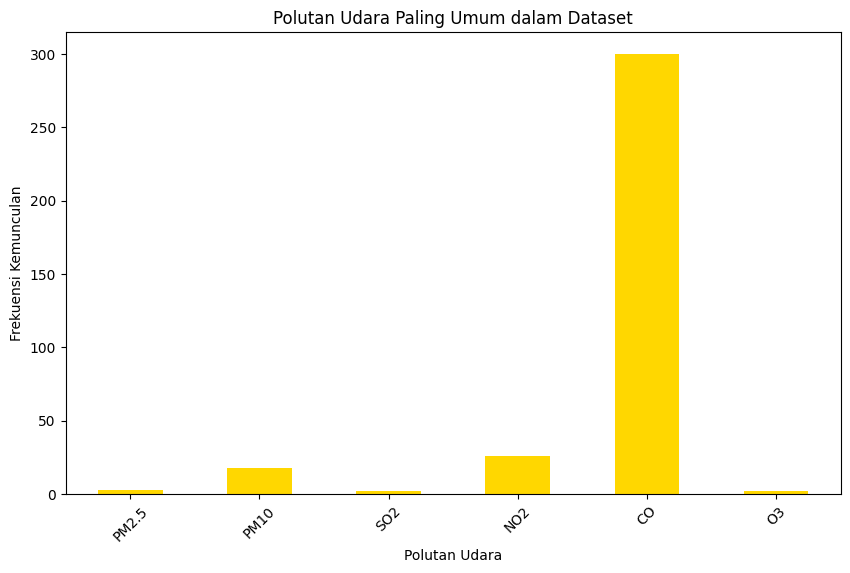

In [20]:
# Kolom-kolom yang mengandung data polutan udara
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

# Mencari frekuensi kemunculan masing-masing polutan
pollutant_counts = df[pollutants].mode().iloc[0]

# Membuat diagram batang untuk polutan yang paling umum
plt.figure(figsize=(10, 6))
pollutant_counts.plot(kind='bar', color='gold')
plt.title('Polutan Udara Paling Umum dalam Dataset')
plt.xlabel('Polutan Udara')
plt.ylabel('Frekuensi Kemunculan')
plt.xticks(rotation=45)
plt.show()

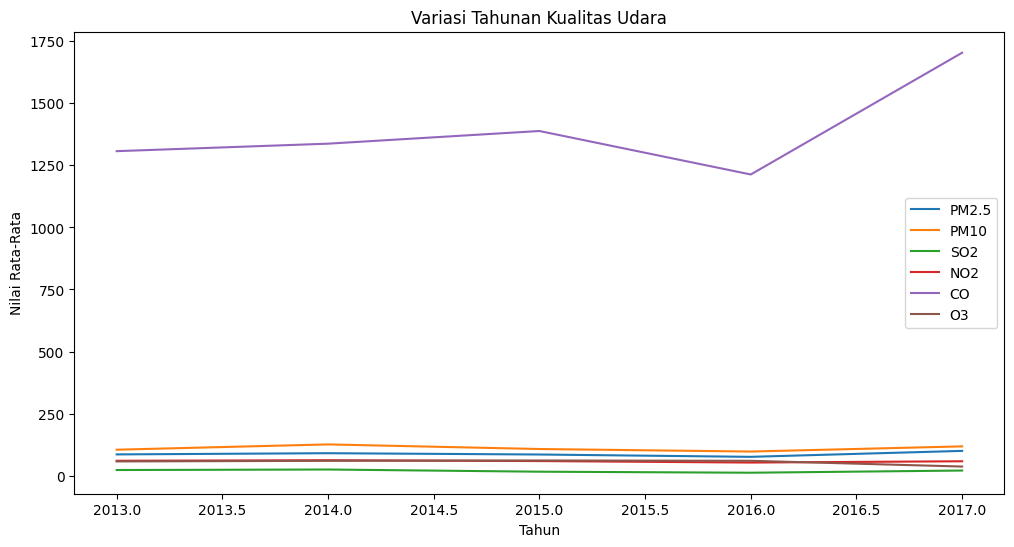

In [21]:
# Agregasi data tahunan
annual_data = df.groupby('year').agg({'PM2.5': 'mean', 'PM10': 'mean', 'SO2': 'mean', 'NO2': 'mean', 'CO': 'mean', 'O3': 'mean'})

# Visualisasi data tahunan
plt.figure(figsize=(12, 6))
for column in annual_data.columns:
    plt.plot(annual_data.index, annual_data[column], label=column)

plt.title('Variasi Tahunan Kualitas Udara')
plt.xlabel('Tahun')
plt.ylabel('Nilai Rata-Rata')
plt.legend()
plt.show()

**Conclusion**

* Polutan udara yang paling umum adalah CO
* CO menempati posisi paling tinggi polutan dengan kualitas yang semakin meningkat hingga pada tahun 2017 menempati posisi tertinggi.

In [22]:
!pip install streamlit

In [23]:
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
updated 1 package and audited 36 packages in 0.792s

3 packages are looking for funding
  run `npm fund` for details

found 2 moderate severity vulnerabilities
  run `npm audit fix` to fix them, or `npm audit` for details


In [28]:
import urllib
print("Password/Enpoint IP for localtunnel is:", urllib.request.urlopen('https://ipv4.icanhazip.com').read().decode('utf8').strip("\n"))

Password/Enpoint IP for localtunnel is: 34.73.172.220


In [34]:
!streamlit run /content/copy_of_steamlit_david_satriana.py &>/content/logs.txt &

In [35]:
!npx localtunnel --port 8501

npx: installed 22 in 2.197s
your url is: https://silver-mice-drum.loca.lt
